In this notebook, use of clustering is explored in two different ways: 
1. clustering as data exploration 
2. image compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import DBSCAN
import itertools 
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

%matplotlib inline

#### 1. Clustering as data exploration
For this application we will use clustering to perform customer segmentation. Typically there are models such as RFM model, LTV models, etc., to perform such task. In this notebook, we will just use the data as-is (with some scaling, etc.) to perform clustering.

The dataset to use is credit card dataset that can be found [here](https://www.kaggle.com/arjunbhasin2013/ccdata/data) on Kaggle. The goal is to segment the customers into group, to reveal (any) hidden pattern within the customers.

In [2]:
# Load data
CC = pd.read_csv("creditcard.csv")
CC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


First remove the CUST_ID column (since we want all numeric features). Then remove missing values and scale the data, since the features are on different scale.

In [3]:
# Remove CUST_ID
del CC['CUST_ID']

# Remove missing values
credit_card = CC.dropna()

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(credit_card)
credit_card_scaled = pd.DataFrame(scaler.transform(credit_card))

Notice this dataset doesn't have label, hence it's an excellent dataset to practice clustering (or unsupervised) techniques. We will use Hierarchical clustering, DBScan, and Gaussian Mixture Models on this dataset.

### Steps followed for each method:
1. Perform clustering that gives between 3-5 clusters
2. Using the **original unscaled data** (without the customer ID), calculate the mean of each cluster
3. Describe the findings

This is a very simple approach to customer segmentation. We will group the customers into groups, and try to extract some common features from observations within the same group.

#### Hierarchical Clustering

In [4]:
# Using Agglomerative Hierarchical Clustering technique on credit card data

In [5]:
AC3 = AgglomerativeClustering(n_clusters = 5)                    # instantiate model
credit_card['AC_class'] = AC3.fit_predict(credit_card_scaled)    # fit model on credit card scaled data

/Users/anupahire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# get mean of features grouped based on cluster assigned
credit_card.groupby(['AC_class']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
AC_class,,,,,,,,,,,,,,,,,
0,3879.514557,0.988517,6908.217849,4581.572037,2328.018810,679.151156,0.950319,0.720803,0.807517,0.078805,1.940503,84.908467,9467.048055,6344.149755,1794.436496,0.158697,11.965675
1,951.682904,0.809199,304.735132,192.578754,112.549719,527.441409,0.219492,0.081253,0.137013,0.103220,2.074175,3.950095,3304.832770,982.955316,669.163320,0.097254,11.840196
2,4695.246244,0.976833,516.485713,333.451417,183.144519,4167.246654,0.259272,0.141404,0.161969,0.442056,13.413547,7.625668,7805.748663,3759.561600,2217.096414,0.037234,11.795009
3,954.735370,0.975482,1385.719044,709.145632,676.753047,286.676850,0.893277,0.333145,0.700948,0.050301,1.007689,23.716221,4430.276955,1577.517889,539.832131,0.283814,11.939216
4,1130.427868,0.839706,523.411384,301.599912,221.855655,1319.908528,0.490202,0.142575,0.344338,0.209196,3.480118,7.234168,2856.730486,747.323725,389.224031,0.195720,7.546392


In [7]:
# Get count of observations grouped based on cluster assigned
credit_card.groupby(['AC_class'])['AC_class'].count()

AC_class
0     437
1    3667
2    1122
3    2731
4     679
Name: AC_class, dtype: int64

Observations: 

*From the results above, count and mean of features grouped based on clusters shows that maximum observations are grouped in class 1, however mean of class 1 is lowest. This shows class 1 groups customers with low credit balance.


*least number of observations are grouped under class 0. However mean of class 0 is significantly high which indicates class 0 groups customers with high credit balance

#### DBScan

In [8]:
# create hyperparameter set with different combinations for epsilon and min_samples
epsilons = np.linspace(0.1, 0.9, 5)
min_sample_cnt = np.linspace(3, 15, 5, dtype=int)

hyperparam_set = list(itertools.product(epsilons, min_sample_cnt))

In [9]:
# iterate over hyperparameter set, fit DBSCAN model and use silhouette_score as criteria to select best hyperparameter pair
score=[]
for param in hyperparam_set:
    dbscan = DBSCAN(eps=param[0], min_samples=param[1])
    dbscan.fit(credit_card_scaled)
    score.append(silhouette_score(credit_card_scaled, dbscan.labels_))

best_param = hyperparam_set[np.argmax(score)]
print('Best hyper parameter set :', best_param)

Best hyper parameter set : (0.9, 12)


In [10]:
# fir DBSAN model using best hyperparameter pair on credit_card_scaled data
dbscan_model = DBSCAN(eps = best_param[0], min_samples = best_param[1])
dbscan_model.fit(credit_card_scaled)

DBSCAN(eps=0.9, min_samples=12)

In [11]:
# Number of unique clusters
print('Unique clusters:', np.unique(dbscan_model.labels_) )
print('Total Nbr of unique clusters:', np.unique(dbscan_model.labels_).shape[0] ) 

Unique clusters: [-1  0  1  2]
Total Nbr of unique clusters: 4


In [12]:
# predict class on unscaled data and update class in unscaled data dataframe
credit_card['dbscan_class'] = DBSCAN(eps = best_param[0], min_samples = best_param[1]).fit_predict(credit_card_scaled)

/Users/anupahire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
credit_card.groupby(['dbscan_class']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AC_class
dbscan_class,,,,,,,,,,,,,,,,,,
-1,2220.834010,0.902584,1711.416068,1062.485791,649.275414,1603.341738,0.598687,0.319051,0.432858,0.189591,5.000463,23.105689,6056.388188,2834.557373,1282.427203,0.183822,11.185245,2.223867
0,988.436221,0.886488,334.993336,143.434738,191.831131,386.903123,0.387475,0.087797,0.304240,0.086273,1.637875,6.907069,2971.899721,732.582736,447.880004,0.127025,11.904494,1.654494
1,66.742144,0.992424,719.513333,707.794167,11.719167,0.000000,0.982639,0.982639,0.017361,0.000000,0.000000,12.958333,6312.500000,776.488562,172.450337,0.944287,12.000000,3.000000
2,68.160229,0.991071,445.250625,0.000000,447.125625,0.000000,0.991071,0.000000,0.832961,0.000000,0.000000,6.250000,1093.750000,368.600547,90.004804,0.973958,6.375000,4.000000


In [14]:
# Get count of observations grouped based on cluster assigned
credit_card.groupby(['dbscan_class'])['dbscan_class'].count()

dbscan_class
-1    4324
 0    4272
 1      24
 2      16
Name: dbscan_class, dtype: int64

Observations: 

From the average of features which is grouped based on class shows that there are many obersvations which are not assigned to any group and grouped as outliers (class -1). This shows DBSCAN is not very good technique for clustering the credit card data under study.

#### GMM

In [15]:
# Using GMM Clustering technique on credit card data

In [16]:
# fit GMM on scaled credit card data with hyperparameter tuning for n_components
aic_score = []
iters = [3,4,5]
for n in iters:
    gmm_per_n = GaussianMixture(n_components= n, n_init=10, random_state=862).fit(credit_card_scaled)
    aic_score.append(gmm_per_n.aic(credit_card_scaled))

print('best n_components parameter :', iters[np.argmin(aic_score)])

best n_components parameter : 5


In [17]:
# fit GMM model with best hyperparameter selected
gmm_best = GaussianMixture(n_components= 5, n_init=10, random_state=862).fit(credit_card_scaled)

# predict class on unscaled data and update class in unscaled data dataframe
credit_card['gmm_class'] = gmm_best.predict(credit_card_scaled)

/Users/anupahire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
# get mean of features grouped based on cluster assigned
credit_card.groupby(['gmm_class']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AC_class,dbscan_class
gmm_class,,,,,,,,,,,,,,,,,,,
0,2154.524333,0.914268,34.436216,34.436216,0.000000,1874.074667,0.026288,0.026288,0.000000,0.267598,5.944027,0.345029,4017.448292,1537.873796,747.196646,0.029941,11.378864,1.540936,-0.359231
1,4191.014861,0.958428,3991.675449,2476.592218,1520.162830,3273.357679,0.676414,0.328732,0.568998,0.260044,10.606119,47.552581,7878.489484,6879.384758,5255.257543,0.123141,11.795411,1.300191,-0.973231
2,1053.573524,0.923748,1659.450230,1018.575856,640.874374,0.000000,0.711885,0.375247,0.504726,0.000000,0.000000,24.133062,5008.797950,1741.326289,534.180473,0.198913,12.000000,2.038176,-0.491846
3,2079.913700,0.937161,996.628937,624.257565,372.371371,1387.099941,0.642811,0.292488,0.441795,0.239231,5.137711,16.131900,4496.376784,1654.126549,768.512044,0.087937,11.135386,2.381174,-0.775712
4,43.287155,0.718755,379.357892,18.281431,361.099538,0.000000,0.646010,0.021215,0.588821,0.000000,0.000000,8.659231,3125.042774,451.011271,125.400675,0.424350,11.277692,2.195385,-0.182308


In [19]:
# Get count of observations grouped based on cluster assigned
credit_card.groupby(['gmm_class'])['gmm_class'].count()

gmm_class
0    2394
1     523
2    2698
3    1721
4    1300
Name: gmm_class, dtype: int64

Observations: 

From the mean of features calculated based on class shows the class 1 has highest average credit balance yet lowest customers assigned to this class. Which indicates that class 1 customers have high credit balance or we can say that the class 0 customers are high spending customers. Class 4 customers are lowest spending customers.

# Image compression using K-Means
Another application of clustering is image compression, which is also known as color quantization. In simple words, the idea is to represent an image using a fewer number of colors (hence achieving a compression). Part of this exercise is taken from [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

An image is essentially a bunch of pixels grouped together. A pixel ranges from 0 - 255, where 0 presents dark and 255 white. For colored images, it can be presented as a 3D array of dimension m x n x 3, where the 3 dimensions represent RGB colors. 

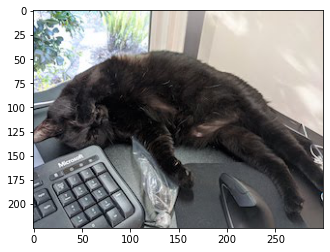

In [20]:
# Let's load the image
from matplotlib.image import imread
img = imread('cat.jpg')
plt.imshow(img)
plt.show()

In [21]:
# This is the image size
img_size = img.shape
img_size

(225, 300, 3)

The image has dimension 247 x 300 x 3. Think of it as a matrix with 3 layers, where each layer is of dimension 247 x 300. If you explore the image, you will see it consists of many random values:

Each row is a pixel on the image. The goal here is to group similar pixels by replace it with the cluster mean. We will use KMeans to achieve this.

In [22]:
# First reshape it to be 2-dimensional
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X.shape)

(67500, 3)


Let's consider 30 clusters. First task is to run K-Means on this reshaped data set with 30 clusters.

In [23]:
# Run the Kmeans algorithm
# compressed = .....
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 30, random_state=862)
compressed = kmeans.fit(X)

Now let's plot the original image and the compressed image, and compare the difference.

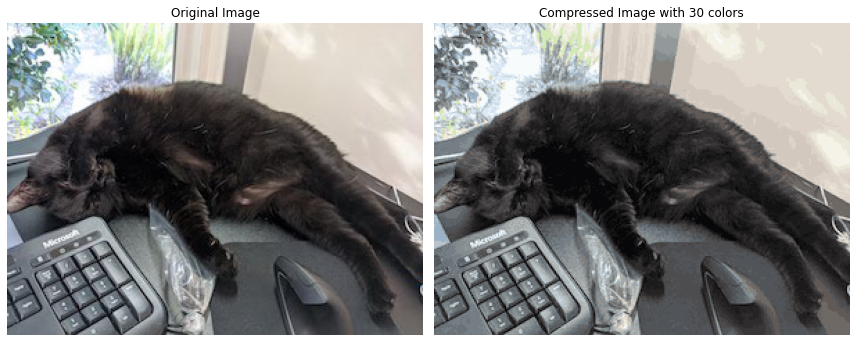

In [24]:
# Use the centroids to compress the image
X_compressed = compressed.cluster_centers_[compressed.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_compressed to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

Observation: From the comparison of original and compressed image we can see that compressed image has lesser color details. For example the brown color in original image is replaced by shades of grey. Also the green color of leaves in original image is represented by shades of grey in complressed image.

Now let's repeat the same procedure, but use the inertia to determine the best K value (it takes awhile to run for large K values).

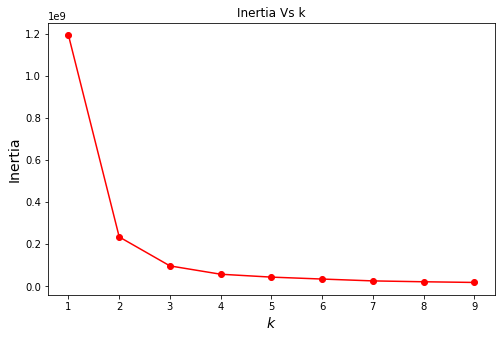

In [25]:
# Find best K
kmeans_per_k = [KMeans(n_clusters=k, random_state=862).fit(X)
                for k in range(1, 10)]

# Extract the inertia for each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, "ro-")  # 'bo-' plot x and y using blue circle markers
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title('Inertia Vs k')
plt.show()

In [26]:
# Redo the compression with your selected K value
kmeans_bestk = KMeans(n_clusters = 4, random_state=862)
compressed_bestk = kmeans_bestk.fit(X)

X_compressed_bestk = compressed_bestk.cluster_centers_[compressed_bestk.labels_]
X_compressed_bestk = np.clip(X_compressed_bestk.astype('uint8'), 0, 255)

In [27]:
# Reshape X_compressed to have the same dimension as the original image 128 * 128 * 3
X_compressed_bestk = X_compressed_bestk.reshape(img_size[0], img_size[1], img_size[2])

# Plot the old and new image

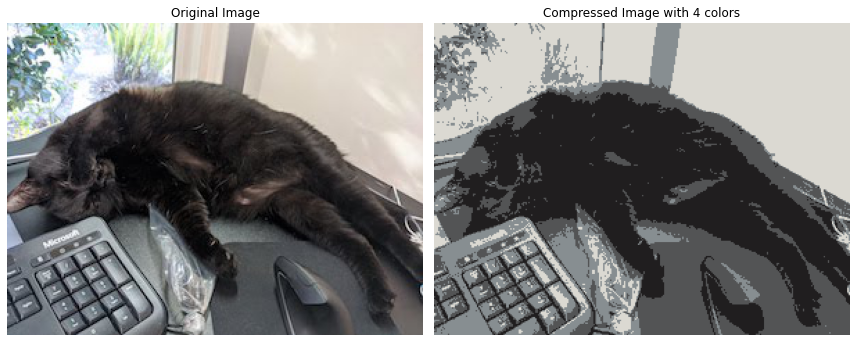

In [28]:
# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed_bestk)
ax[1].set_title('Compressed Image with 4 colors')
for ax in fig.axes:
    ax.axis('off')    # Turn off axis lines and labels.
plt.tight_layout();

Observation: The compressed image shows how different colours in original image are represented with only 4 colours.
The quality of compressed image is hampered but as we can see, the objects in the compressed image are still clearly visible with using as low as 4 colours.